# Read file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'data_V5.csv'

In [3]:
df = pd.read_csv(path, sep=',', encoding='ISO-8859-1')

In [4]:
df.head()

,date,recipe_id,country,region,city,categories,day,hour,season
0,29.07.2013 21:14,136996.0,DE,16.0,Berlin,"['Braten (Fleisch)', 'Fleisch', 'Milchprodukte...",29/07/2013,21:14,summer
1,29.07.2013 21:14,255239.0,DE,2.0,Munich,"['Asien', 'Japan', 'Suppen/Eintoepfe', 'Vorspe...",29/07/2013,21:14,summer
2,29.07.2013 21:14,447948.0,DE,16.0,Berlin,"['kalt', 'glutenfrei', 'laktosefrei', 'ohne We...",29/07/2013,21:14,summer
3,29.07.2013 21:14,131582.0,DE,16.0,Berlin,"['glutenfrei', 'laktosefrei', 'ohne Weizen']",29/07/2013,21:14,summer
4,29.07.2013 21:15,35361.0,DE,16.0,Berlin,"['trocknen', 'Gesund und Diaet', 'laktosefrei'...",29/07/2013,21:15,summer


# Count categories

In [5]:
def get_categories_counter(categories_column):
    """ nan_indexes are not indexes from df/series but normal indexes"""
    
    import math
    from tqdm import tqdm
    
    result = dict()
    nan_indexes = list()
    i = 0
    with tqdm(total=len(categories_column)) as pbar:
        for categories in categories_column:
            i += 1
            if (type(categories)) == str:
                categories = categories.replace('[','').replace(']','').replace("'","").replace(', ',',').lower()

                for category in categories.split(','):
                    if result.get(category) != None:
                        result[category] += 1
                    else:
                        result[category] = 1
            else:
                nan_indexes += [i]
                if result.get('nan') != None:
                    result['nan'] += 1
                else:
                    result['nan'] = 1
            
            pbar.update(1)
           
    return result, nan_indexes

In [6]:
categories_counter, nan_indexes = get_categories_counter(df.categories)

100%|██████████| 1576832/1576832 [00:19<00:00, 82092.71it/s] 


In [7]:
print('Number of nan values in the dataset:', len(nan_indexes), 
      '. It is ', np.round(len(nan_indexes)/ len(df) * 100, 2),'% from the whole dataset.')

Number of nan values in the dataset: 350840 . It is  22.25 % from the whole dataset.


In [8]:
print('We have ', len(df) - len(nan_indexes), ' examples left.')

We have  1225992  examples left.


# Plot data

In [9]:
import operator

In [10]:
sorted_desc = dict( sorted(categories_counter.items(), key=operator.itemgetter(1),reverse=True))

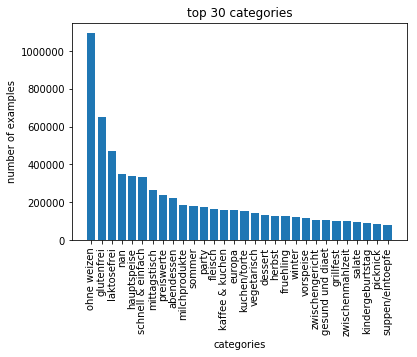

In [11]:
# take only n top results
n = 30
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

plt.bar(range(n), n_values)
plt.ylabel('number of examples')
plt.title('top '+str(n)+' categories')
plt.xlabel('categories')
plt.xticks(range(n), n_keys, rotation='vertical')
plt.show()

## Group data by season

In [12]:
df_by_season = df.groupby('season')

categories_season = dict()
for name, group in df_by_season:
    print(name)
    print(len(group))
    #print(group.index)
    categories_season[name], nan_list = get_categories_counter(group.categories)
    print('Number of nan elements:', len(nan_list), '(', np.round(len(nan_list)/len(group)*100, 2),'%)')
    print('We have ', categories_season[name][''], '(', np.round(categories_season[name]['']/len(group)*100, 2),'%)' , 'empty categories.')

summer
913359


100%|██████████| 913359/913359 [00:11<00:00, 78393.94it/s] 


Number of nan elements: 226663 ( 24.82 %)
We have  36954 ( 4.05 %) empty categories.
winter
663473


100%|██████████| 663473/663473 [00:09<00:00, 71851.66it/s] 


Number of nan elements: 124177 ( 18.72 %)
We have  25664 ( 3.87 %) empty categories.


## Delete nan and empty values from dict
We don't want these values on charts

In [14]:
del(categories_season['winter']['nan'])
del(categories_season['summer']['nan'])

In [15]:
del(categories_season['winter'][''])
del(categories_season['summer'][''])

# Plot by season

In [16]:
import plotly 
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

In [ ]:
with open('plotly_config.txt') as file:
    content = file.read()
    
username, api_key = content.split(';')
print('usename:', username, '\napi_key:', api_key)

In [18]:
plotly.tools.set_credentials_file(username=username, api_key=api_key)

In [19]:
# both seasons
labels = list(categories_season.keys())

sorted_desc = dict(sorted(categories_season[labels[0]].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace1 = go.Bar(x=n_keys, y=n_values)

sorted_desc = dict(sorted(categories_season[labels[1]].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace2 = go.Bar(x=n_keys, y=n_values)

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=(labels[0], labels[1]))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=800, title='Top ' + str(n) + ' categories')

py.iplot(fig, filename='all_cities_both_seasons')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [299]:
# summer
sorted_desc = dict(sorted(categories_season['summer'].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace = {
  'x': n_keys,
  'y': n_values,
  'name': 'Trace',
  'type': 'bar'
 }
 
data = [trace];
layout = {
  #'xaxis': {'title': 'categories'},
  'yaxis': {'title': 'number of examples'},
  'barmode': 'relative',
  'title': 'Top '+str(n)+' categories' + '<br> (summer)'
};
py.iplot({'data': data, 'layout': layout}, filename='all_cities_summer')

In [300]:
# winter
sorted_desc = dict(sorted(categories_season['winter'].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace = {
  'x': n_keys,
  'y': n_values,
  'name': 'Trace',
  'type': 'bar'
 }
 
data = [trace];
layout = {
 # 'xaxis': {'title': 'categories'},
  'yaxis': {'title': 'number of examples'},
  'barmode': 'relative',
  'title': 'Top '+str(n)+' categories' + '<br> (winter)'
};
py.iplot({'data': data, 'layout': layout}, filename='all_cities_winter')

# Group data by city

In [20]:
df_by_city = df.groupby('city')

categories_city = dict()
for name, group in df_by_city:
    print('\n',name)
    print(len(group))

    categories_city[name], nan_list = get_categories_counter(group.categories)
    print('Number of nan elements:', len(nan_list), '(', np.round(len(nan_list)/len(group)*100, 2),'%)')
    print('We have ', categories_city[name][''], '(', np.round(categories_city[name]['']/len(group)*100, 2),'%)' , 'empty categories.')


 Berlin
369769


100%|██████████| 369769/369769 [00:05<00:00, 65650.57it/s]


Number of nan elements: 0 ( 0.0 %)
We have  19849 ( 5.37 %) empty categories.

 Bremerhaven
7394


100%|██████████| 7394/7394 [00:00<00:00, 27324.82it/s]


Number of nan elements: 0 ( 0.0 %)
We have  380 ( 5.14 %) empty categories.

 Darmstadt
27743


100%|██████████| 27743/27743 [00:00<00:00, 37585.92it/s]


Number of nan elements: 0 ( 0.0 %)
We have  1540 ( 5.55 %) empty categories.

 Erlangen
19104


100%|██████████| 19104/19104 [00:00<00:00, 40809.25it/s]


Number of nan elements: 0 ( 0.0 %)
We have  960 ( 5.03 %) empty categories.

 Frankfurt_Am_Main
207472


100%|██████████| 207472/207472 [00:03<00:00, 57822.05it/s]


Number of nan elements: 0 ( 0.0 %)
We have  9958 ( 4.8 %) empty categories.

 Hamburg
206573


100%|██████████| 206573/206573 [00:03<00:00, 63883.16it/s]


Number of nan elements: 0 ( 0.0 %)
We have  10457 ( 5.06 %) empty categories.

 Koeln
116548


100%|██████████| 116548/116548 [00:01<00:00, 67834.15it/s]


Number of nan elements: 0 ( 0.0 %)
We have  5784 ( 4.96 %) empty categories.

 Munich
249118


100%|██████████| 249118/249118 [00:03<00:00, 63296.05it/s]


Number of nan elements: 0 ( 0.0 %)
We have  12461 ( 5.0 %) empty categories.

 Potsdam
9586


100%|██████████| 9586/9586 [00:00<00:00, 46315.52it/s]


Number of nan elements: 0 ( 0.0 %)
We have  564 ( 5.88 %) empty categories.

 Siegen
12685


100%|██████████| 12685/12685 [00:00<00:00, 49871.77it/s]


Number of nan elements: 0 ( 0.0 %)
We have  665 ( 5.24 %) empty categories.


## Delete empty values

In [21]:
cities = list(set(df.city))[1:]
print(cities)

[nan, 'Koeln', 'Siegen', 'Frankfurt_Am_Main', 'Bremerhaven', 'Munich', 'Hamburg', 'Berlin', 'Erlangen', 'Darmstadt']


In [ ]:
for city in cities:
    del(categories_city[city][''])

# Plot by city

In [22]:
cities_pairs = [('Berlin', 'Potsdam'), ('Koeln', 'Siegen'), ('Frankfurt_Am_Main', 'Darmstadt'), ('Munich', 'Erlangen'), ('Hamburg', 'Bremerhaven')]

In [23]:
chosen_city = cities_pairs[0][0]

In [24]:
sorted_desc = dict(sorted(categories_city[chosen_city].items(), key=operator.itemgetter(1),reverse=True))
n = 20
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace = {
  'x': n_keys,
  'y': n_values,
  'name': 'Trace',
  'type': 'bar'
 }
 
data = [trace];
layout = {
 # 'xaxis': {'title': 'categories'},
  'yaxis': {'title': 'number of examples'},
  'barmode': 'relative',
  'title': 'Top ' + str(n) + ' categories' + '<br> for ' + chosen_city
};
py.iplot({'data': data, 'layout': layout}, filename='top_categories_one_city')

## Plot both cities from pair

### Plots in one row

pair_number: number of pair

n: number of top n categories to show

In [25]:
def plot_v1(categories_city, cities_pairs, pair_nr, n):
    labels = list(cities_pairs[pair_nr])
    sorted_desc = dict(sorted(categories_city[labels[0]].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace1 = go.Bar(x=n_keys, y=n_values, name=labels[0])

    sorted_desc = dict(sorted(categories_city[labels[1]].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace2 = go.Bar(x=n_keys, y=n_values, name=labels[1])

    fig = tools.make_subplots(rows=1, cols=2, subplot_titles=(labels[0], labels[1]))

    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)

    fig['layout'].update(height=500, width=1000, title='Top ' + str(n) + ' categories')
    
    return fig

In [26]:
def plot_v2(categories_city, cities_pairs, pair_nr, n):
    labels = list(cities_pairs[pair_nr])
    sorted_desc = dict(sorted(categories_city[labels[0]].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace1 = go.Bar(x=n_keys, y=n_values, name=labels[0])

    sorted_desc = dict(sorted(categories_city[labels[1]].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace2 = go.Bar(x=n_keys, y=n_values, name=labels[1])

    layout = go.Layout(
        barmode='group',
        title='Top ' + str(n) + ' categories',
        yaxis=dict(
            title='number of examples',
            titlefont=dict(
                size=14,
                color='rgb(107, 107, 107)'
            ),
            tickfont=dict(
                size=12,
                color='rgb(107, 107, 107)'
            )
        ),
        legend=dict(
            x=1,
            y=1.0,
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(255, 255, 255, 0)'
        )
    )

    fig = go.Figure(data=[trace1, trace2], layout=layout)
    
    return fig

In [27]:
def plot_v3(categories_city, cities_pairs, pair_nr, n):
    labels = list(cities_pairs[pair_nr])
    sorted_desc = dict(sorted(categories_city[labels[0]].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace1 = go.Bar(x=n_keys, y=n_values, name=labels[0])

    sorted_desc = dict(sorted(categories_city[labels[1]].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace2 = go.Bar(x=n_keys, y=n_values, name=labels[1])

    layout = go.Layout(
        barmode='overlay',
        height=500,
        width=1000,
        title='Top ' + str(n) + ' categories',
        yaxis=dict(
            title='number of examples',
            titlefont=dict(
                size=14,
                color='rgb(107, 107, 107)'
            ),
            tickfont=dict(
                size=12,
                color='rgb(107, 107, 107)'
            )
        ),
        legend=dict(
            x=1,
            y=1.0,
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(255, 255, 255, 0)'
        )
    )
        
    fig = go.Figure(data=[trace1, trace2], layout=layout)

    return fig

In [28]:
fig = plot_v3(categories_city, cities_pairs, pair_nr=0, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_0')

In [29]:
fig = plot_v1(categories_city, cities_pairs, pair_nr=0, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_0')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [30]:
fig = plot_v2(categories_city, cities_pairs, pair_nr=0, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_0')

In [308]:
fig = plot_v1(categories_city, cities_pairs, pair_nr=1, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_1')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [309]:
fig = plot_v1(categories_city, cities_pairs, pair_nr=2, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_2')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [310]:
fig = plot_v1(categories_city, cities_pairs, pair_nr=3, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_3')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [311]:
fig = plot_v1(categories_city, cities_pairs, pair_nr=4, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_4')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### Plots in one column

In [31]:
pair_nr = 0
n = 20

labels = list(cities_pairs[pair_nr])
sorted_desc = dict(sorted(categories_city[labels[0]].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace1 = go.Bar(x=n_keys, y=n_values)

sorted_desc = dict(sorted(categories_city[labels[1]].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace2 = go.Bar(x=n_keys, y=n_values)

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=(labels[0], labels[1]))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=600, title='Top ' + str(n) + ' categories')

py.iplot(fig, filename='top_categories_pair_of_cities')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



# Find unique categories

In [32]:
def get_categories(categories_column):
    
    import math
    from tqdm import tqdm
    
    result = dict()
    i = 0
    with tqdm(total=len(categories_column)) as pbar:
        for categories in categories_column:
            i += 1
            if (type(categories)) == str:
                categories = categories.replace('[','').replace(']','').replace("'","").replace(', ',',').lower()

                for category in categories.split(','):
                    if result.get(category) != None:
                        result[category] += 1
                    else:
                        result[category] = 1
            else:
                if result.get('nan') != None:
                    result['nan'] += 1
                else:
                    result['nan'] = 1
            
            pbar.update(1)
           
    return result

In [33]:
c = get_categories(df.categories)

100%|██████████| 1576832/1576832 [00:18<00:00, 87402.83it/s] 


In [34]:
sorted_desc = dict(sorted(c.items(), key=operator.itemgetter(1),reverse=True))

In [35]:
sorted_desc

{'ohne weizen': 1095555,
 'glutenfrei': 651479,
 'laktosefrei': 468793,
 'nan': 350840,
 'hauptspeise': 336356,
 'schnell & einfach': 335893,
 'mittagstisch': 266412,
 'preiswerte': 235826,
 'abendessen': 222823,
 'milchprodukte': 186127,
 'sommer': 180737,
 'party': 175749,
 'fleisch': 164771,
 'kaffee & kuchen': 160505,
 'europa': 159743,
 'kuchen/torte': 155204,
 'vegetarisch': 145357,
 'dessert': 132700,
 'herbst': 127352,
 'fruehling': 126766,
 'winter': 120675,
 'vorspeise': 116249,
 'zwischengericht': 107096,
 'gesund und diaet': 106406,
 'grillfest': 103040,
 'zwischenmahlzeit': 100580,
 'salate': 97603,
 'kindergeburtstag': 87806,
 'picknick': 86118,
 'suppen/eintoepfe': 81304,
 'date': 78798,
 'auflauf /ueberbackenes': 74373,
 'festlich': 72086,
 'braten (fleisch)': 69179,
 'resteverwertung': 67999,
 'beilagen': 66693,
 'kindergerichte': 65377,
 '': 62618,
 'kalt': 60238,
 'studentenkueche': 58965,
 'fingerfood/snack': 57607,
 'weihnachten': 55875,
 'fruehstueck': 55213,
 'fi

In [36]:
del (sorted_desc[''])

In [37]:
del (sorted_desc['nan'])

### Choose frequent categories

In [38]:
dict2 = dict()
for k,v in sorted_desc.items():
    if v >= 100:
        dict2[k]=v

In [39]:
len(dict2)

214

In [40]:
dict2

{'abendessen': 222823,
 'aegypten': 523,
 'aethiopien': 146,
 'afghanistan': 338,
 'afrika': 6385,
 'albanien': 319,
 'algerien': 148,
 'alkoholfreie getraenke': 9503,
 'alkoholische getraenke': 22550,
 'allergien und unvertraeglichkeiten': 584,
 'allgaeuer kueche': 795,
 'amerika': 25476,
 'anlaesse': 544,
 'arabische kueche': 3618,
 'argentinien': 491,
 'asien': 41680,
 'auflauf /ueberbackenes': 74373,
 'australien': 672,
 'ayurveda': 375,
 'babynahrung': 1921,
 'backen': 37837,
 'badische kueche ': 6240,
 'ballaststoffreich': 229,
 'baltikum': 478,
 'barbecue': 30224,
 'bayerische kueche': 19163,
 'beilagen': 66693,
 'beizen': 656,
 'belgien': 511,
 'berliner kueche': 8214,
 'blanchieren': 361,
 'bosnien / herzegowina': 731,
 'brandenburger kueche': 690,
 'brasilien': 624,
 'braten': 29100,
 'braten (fleisch)': 69179,
 'bremer kueche': 348,
 'brot': 28992,
 'buffets/dekorationen': 11190,
 'bulgarien': 365,
 'camping': 24127,
 'china': 7759,
 'cholesterinarm': 468,
 'cross-cooking': 

In [384]:
count = 0
sumuj = 0 
for k,v in sorted_desc.items():
    if v < 100:
        count += 1
        sumuj += v

In [385]:
count

1984

In [386]:
sumuj

4981

# Group by season and city

In [41]:
df_summer = df[df.season == 'summer']

cities_summer = dict()
df_by_city = df_summer.groupby('city')
for name, group in df_by_city:
    print(name)
    print(len(group))

    cities_summer[name], nan_list = get_categories_counter(group.categories)
    print('Number of nan elements:', len(nan_list), '(', np.round(len(nan_list)/len(group)*100, 2),'%)')
    print('We have ', cities_summer[name][''], '(', np.round(cities_summer[name]['']/len(group)*100, 2),'%)' , 'empty categories.')

Berlin
218883


100%|██████████| 218883/218883 [00:04<00:00, 51311.77it/s]


Number of nan elements: 0 ( 0.0 %)
We have  12377 ( 5.65 %) empty categories.
Bremerhaven
4373


100%|██████████| 4373/4373 [00:00<00:00, 46691.41it/s]


Number of nan elements: 0 ( 0.0 %)
We have  270 ( 6.17 %) empty categories.
Darmstadt
18242


100%|██████████| 18242/18242 [00:00<00:00, 45307.85it/s]


Number of nan elements: 0 ( 0.0 %)
We have  1050 ( 5.76 %) empty categories.
Erlangen
10908


100%|██████████| 10908/10908 [00:00<00:00, 42866.31it/s]


Number of nan elements: 0 ( 0.0 %)
We have  560 ( 5.13 %) empty categories.
Frankfurt_Am_Main
92387


100%|██████████| 92387/92387 [00:01<00:00, 48634.39it/s]


Number of nan elements: 0 ( 0.0 %)
We have  5060 ( 5.48 %) empty categories.
Hamburg
117115


100%|██████████| 117115/117115 [00:01<00:00, 65161.20it/s]


Number of nan elements: 0 ( 0.0 %)
We have  6054 ( 5.17 %) empty categories.
Koeln
69527


100%|██████████| 69527/69527 [00:01<00:00, 63661.63it/s]


Number of nan elements: 0 ( 0.0 %)
We have  3588 ( 5.16 %) empty categories.
Munich
142046


100%|██████████| 142046/142046 [00:02<00:00, 67378.25it/s]


Number of nan elements: 0 ( 0.0 %)
We have  7239 ( 5.1 %) empty categories.
Potsdam
5883


100%|██████████| 5883/5883 [00:00<00:00, 36595.05it/s]


Number of nan elements: 0 ( 0.0 %)
We have  357 ( 6.07 %) empty categories.
Siegen
7332


100%|██████████| 7332/7332 [00:00<00:00, 33608.56it/s]


Number of nan elements: 0 ( 0.0 %)
We have  399 ( 5.44 %) empty categories.


In [42]:
df_winter = df[df.season == 'winter']

cities_winter = dict()
df_by_city = df_winter.groupby('city')
for name, group in df_by_city:
    print(name)
    print(len(group))

    cities_winter[name], nan_list = get_categories_counter(group.categories)
    print('Number of nan elements:', len(nan_list), '(', np.round(len(nan_list)/len(group)*100, 2),'%)')
    print('We have ', cities_winter[name][''], '(', np.round(cities_winter[name]['']/len(group)*100, 2),'%)' , 'empty categories.')

Berlin
150886


100%|██████████| 150886/150886 [00:02<00:00, 60880.16it/s]


Number of nan elements: 0 ( 0.0 %)
We have  7472 ( 4.95 %) empty categories.
Bremerhaven
3021


100%|██████████| 3021/3021 [00:00<00:00, 50174.40it/s]


Number of nan elements: 0 ( 0.0 %)
We have  110 ( 3.64 %) empty categories.
Darmstadt
9501


100%|██████████| 9501/9501 [00:00<00:00, 35369.67it/s]


Number of nan elements: 0 ( 0.0 %)
We have  490 ( 5.16 %) empty categories.
Erlangen
8196


100%|██████████| 8196/8196 [00:00<00:00, 30533.83it/s]


Number of nan elements: 0 ( 0.0 %)
We have  400 ( 4.88 %) empty categories.
Frankfurt_Am_Main
115085


100%|██████████| 115085/115085 [00:01<00:00, 68747.65it/s]


Number of nan elements: 0 ( 0.0 %)
We have  4898 ( 4.26 %) empty categories.
Hamburg
89458


100%|██████████| 89458/89458 [00:01<00:00, 68540.45it/s]


Number of nan elements: 0 ( 0.0 %)
We have  4403 ( 4.92 %) empty categories.
Koeln
47021


100%|██████████| 47021/47021 [00:00<00:00, 58450.26it/s]


Number of nan elements: 0 ( 0.0 %)
We have  2196 ( 4.67 %) empty categories.
Munich
107072


100%|██████████| 107072/107072 [00:01<00:00, 67769.20it/s]


Number of nan elements: 0 ( 0.0 %)
We have  5222 ( 4.88 %) empty categories.
Potsdam
3703


100%|██████████| 3703/3703 [00:00<00:00, 47981.18it/s]


Number of nan elements: 0 ( 0.0 %)
We have  207 ( 5.59 %) empty categories.
Siegen
5353


100%|██████████| 5353/5353 [00:00<00:00, 54715.60it/s]


Number of nan elements: 0 ( 0.0 %)
We have  266 ( 4.97 %) empty categories.


In [51]:
for city in cities:
    try:
        del(cities_summer[city][''])
    except:
        pass
    try:
        del(cities_summer[city]['nan'])
    except:
        pass
    try:
        del(cities_winter[city][''])
    except:
        pass
    try:
        del(cities_winter[city]['nan'])
    except:
        pass

In [56]:
def get_plot_summer_winter(cities_summer, cities_winter, city, n=20):
    sorted_desc = dict(sorted(cities_summer[city].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace1 = go.Bar(x=n_keys, y=n_values, name='summer')

    sorted_desc = dict(sorted(cities_winter[city].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace2 = go.Bar(x=n_keys, y=n_values, name='winter')

    fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('summer', 'winter'))

    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)

    fig['layout'].update(height=500, width=1000, title='Top ' + str(n) + ' categories <br> for '+city)

    return fig

In [57]:
fig = get_plot_summer_winter(cities_summer, cities_winter, cities_pairs[0][0], n=20)
py.iplot(fig, filename='plot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [417]:
fig = get_plot_summer_winter(cities_summer, cities_winter, cities_pairs[0][1], n=20)
py.iplot(fig, filename='plot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [418]:
fig = get_plot_summer_winter(cities_summer, cities_winter, cities_pairs[1][0], n=20)
py.iplot(fig, filename='plot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [419]:
fig = get_plot_summer_winter(cities_summer, cities_winter, cities_pairs[1][1], n=20)
py.iplot(fig, filename='plot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [420]:
fig = get_plot_summer_winter(cities_summer, cities_winter, cities_pairs[2][0], n=20)
py.iplot(fig, filename='plot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [421]:
fig = get_plot_summer_winter(cities_summer, cities_winter, cities_pairs[2][1], n=20)
py.iplot(fig, filename='plot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]

